# K드라마 분석

이 노트북에서는 'kdrama.csv' 데이터셋에 대한 탐색적 데이터 분석(EDA) 및 머신러닝 분석을 수행합니다.
이 데이터셋은 한국 드라마에 대한 정보를 담고 있습니다.

우리의 목표는 데이터를 이해하고 한국 드라마의 성공 요인을 파악하는 데 도움이 되는 의미 있는 인사이트를 추출하는 것입니다.
또한 다른 특징들을 기반으로 드라마의 특정 측면을 예측하는 머신러닝 모델을 구축할 것입니다.

진행 단계는 다음과 같습니다:

1. 데이터 로드
2. 탐색적 데이터 분석(EDA) 수행
3. 머신 러닝을 위한 데이터 전처리
4. 머신 러닝 모델 훈련
5. 모델 평가 및 결과 해석
6. 결과에 기반한 데이터 기반 제안 제공

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('kdrama.csv')

# Display the first few rows of the DataFrame
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


이제 데이터를 더 잘 이해하기 위해 몇 가지 탐색적 데이터 분석(EDA)을 수행해 보겠습니다.
먼저 데이터 프레임의 모양, 열의 데이터 유형, 누락된 값의 수를 확인합니다.

In [2]:
# Check the shape of the DataFrame
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check the number of missing values in each column
print('\nNumber of missing values in each column:')
print(df.isnull().sum())

Number of rows: 250
Number of columns: 17

Data types of the columns:
Name                     object
Aired Date               object
Year of release           int64
Original Network         object
Aired On                 object
Number of Episodes        int64
Duration                 object
Content Rating           object
Rating                  float64
Synopsis                 object
Genre                    object
Tags                     object
Director                 object
Screenwriter             object
Cast                     object
Production companies     object
Rank                     object
dtype: object

Number of missing values in each column:
Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director          

데이터프레임에는 250개의 행과 17개의 열이 있습니다. 열의 데이터 유형은 다음과 같습니다:

이름: 개체
방영 날짜: 객체
출시 연도: int64
원본 네트워크: 개체
방영 날짜: 객체
에피소드 수: int64
기간: object
콘텐츠 등급: object
등급: float64
시놉시스: object
장르: object
태그: object
감독: object
각본가: object
출연진: object
제작사: object
등급: object
'콘텐츠 등급' 열에는 5개의 결측값이 있고, '감독' 및 '시나리오 작가' 열에는 각각 1개의 결측값이 있으며, '제작사' 열에는 2개의 결측값이 있습니다.

다음으로, 데이터의 패턴을 식별하기 위해 몇 가지 기본적인 시각적 분석을 수행해 보겠습니다. 먼저 '평점' 열의 분포를 플로팅하는 것으로 시작하겠습니다.

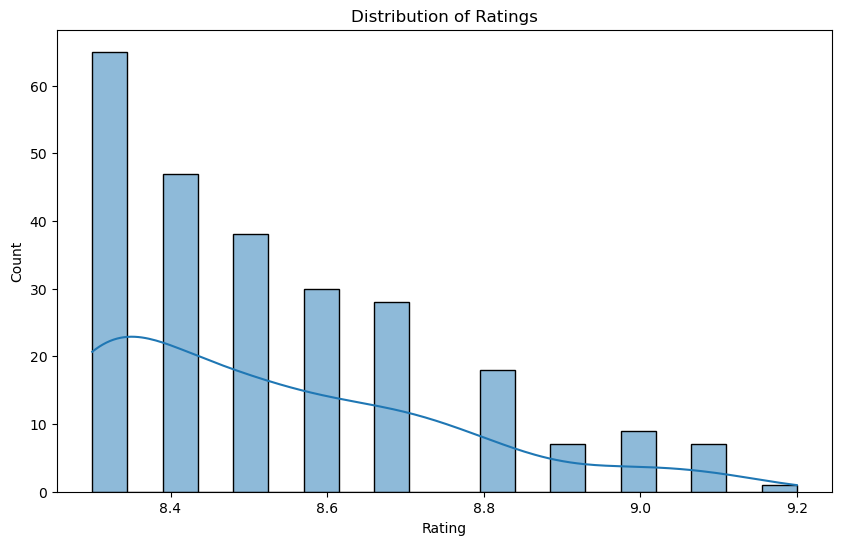

In [3]:
# Plot the distribution of the 'Rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

히스토그램을 보면 평점이 대부분 7.5에서 9 사이에 분포되어 있으며 가장 높은 빈도는 8.5 정도임을 알 수 있습니다.
이는 데이터 세트에 포함된 대부분의 드라마가 높은 평점을 받았다는 것을 의미합니다.

다음으로, '출시 연도'와 '평점' 간의 관계를 분석해 보겠습니다. 이를 시각화하기 위해 산점도를 만들어 보겠습니다.

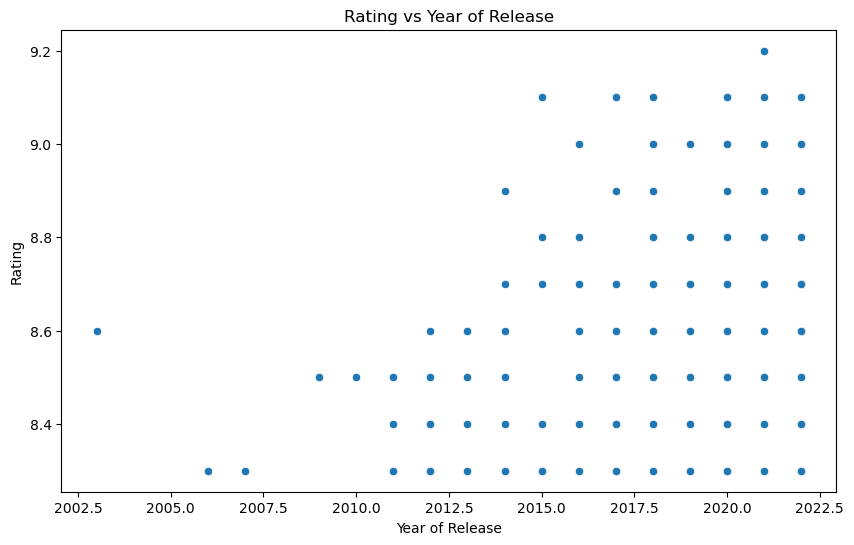

In [4]:
# Plot the relationship between 'Year of release' and 'Rating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year of release', y='Rating', data=df)
plt.title('Rating vs Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Rating')
plt.show()

산점도를 보면 드라마의 출시 연도와 시청률 사이에 뚜렷한 추세가 없음을 알 수 있습니다.
연도별로 시청률이 상당히 분산되어 있어 출시 연도가 시청률을 예측하는 데 큰 영향을 미치지 않을 수 있음을 나타냅니다.

다음으로 '에피소드 수' 열을 분석해 보겠습니다. 에피소드 수의 분포를 시각화하기 위해 히스토그램을 만들어 보겠습니다.

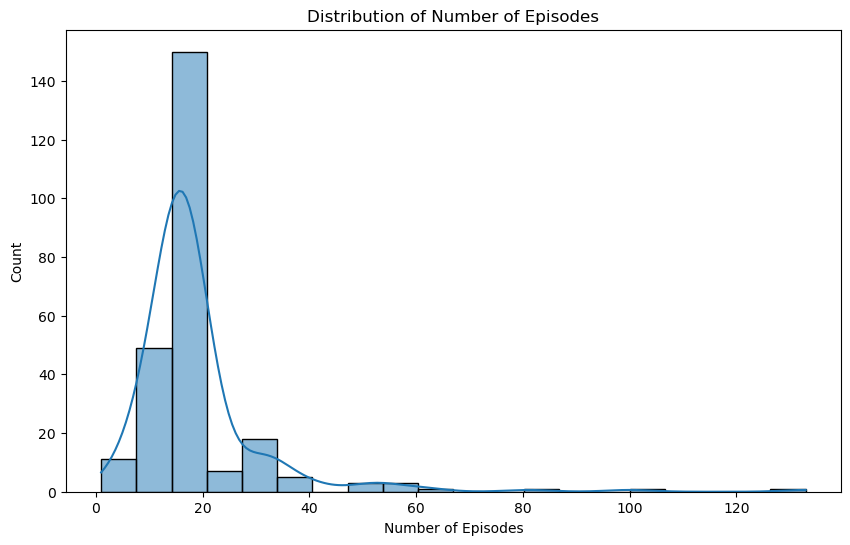

In [5]:
# Plot the distribution of the 'Number of Episodes' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Episodes'], bins=20, kde=True)
plt.title('Distribution of Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Count')
plt.show()

히스토그램을 보면 에피소드 수가 대부분 10~20개 사이에 분포되어 있으며, 가장 높은 빈도는 약 16개임을 알 수 있습니다.
이는 데이터 세트에 포함된 대부분의 드라마가 16회 내외의 에피소드를 가지고 있음을 시사합니다.

다음으로 '원본 네트워크' 열을 분석해 보겠습니다.
각 네트워크에서 제작한 드라마의 수를 시각화하기 위해 막대 그래프를 만들어 보겠습니다.

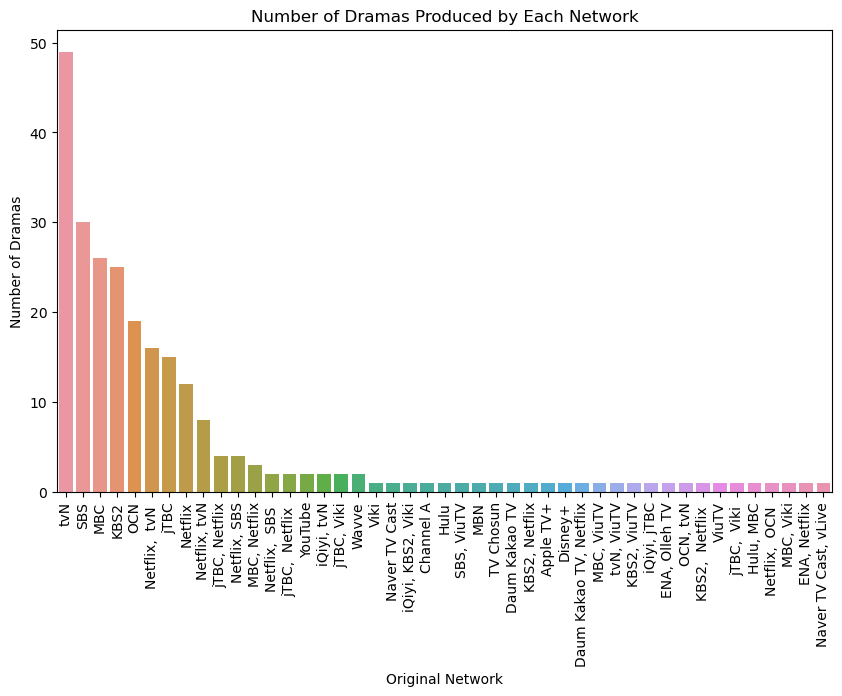

In [6]:
# Count the number of dramas produced by each network
network_counts = df['Original Network'].value_counts()

# Plot the number of dramas produced by each network
plt.figure(figsize=(10, 6))
sns.barplot(x=network_counts.index, y=network_counts.values)
plt.title('Number of Dramas Produced by Each Network')
plt.xlabel('Original Network')
plt.ylabel('Number of Dramas')
plt.xticks(rotation=90)
plt.show()

막대 그래프를 보면 데이터 세트에서 'tvN' 방송사가 가장 많은 드라마를 제작했고, 'KBS2', 'SBS'가 그 뒤를 잇고 있음을 알 수 있습니다.

다음으로 머신러닝을 위해 데이터를 전처리해 보겠습니다. 먼저 범주형 변수를 인코딩하는 것부터 시작하겠습니다.
이를 위해 명목 변수에는 원핫 인코딩을, 서수 변수에는 서수 인코딩을 사용합니다.
또한 각 열에서 가장 빈도가 높은 값으로 결측치를 대입하여 결측치를 처리할 것입니다.

In [7]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Define the nominal and ordinal variables
nominal_vars = ['Name', 'Aired Date', 'Original Network', 'Aired On', 'Duration', 'Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast', 'Production companies', 'Rank']
ordinal_vars = ['Content Rating']

# Define the one-hot encoder and ordinal encoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()

# Define the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Apply the one-hot encoder to the nominal variables
df_nominal = pd.DataFrame(onehot_encoder.fit_transform(df_imputed[nominal_vars]))

# Apply the ordinal encoder to the ordinal variables
df_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(df_imputed[ordinal_vars]))

# Concatenate the encoded variables and the remaining variables
df_encoded = pd.concat([df_imputed.drop(nominal_vars + ordinal_vars, axis=1), df_nominal, df_ordinal], axis=1)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Year of release,Number of Episodes,Rating,0,1,2,3,4,5,6,...,2334,2335,2336,2337,2338,2339,2340,2341,2342,0
0,2021,10,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2020,16,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020,12,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2021,12,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018,16,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check the shape of the encoded DataFrame
print('Number of rows:', df_encoded.shape[0])
print('Number of columns:', df_encoded.shape[1])

# Check the data types of the columns
print('\nData types of the columns:')
print(df_encoded.dtypes)

# Check the number of missing values in each column
print('\nNumber of missing values in each column:')
print(df_encoded.isnull().sum())

작업으로 인해 표시하기에 너무 큰 데이터 프레임이 생성된 것 같습니다.
이는 일부 범주형 변수의 높은 카디널리티로 인해 원핫 인코딩 후 많은 수의 열이 발생하기 때문일 수 있습니다.

이 문제를 처리하기 위해 인코딩하기 전에 범주형 변수의 카디널리티를 줄일 수 있습니다.
한 가지 일반적인 방법은 자주 나타나지 않는 카테고리를 '기타'라는 새 카테고리로 대체하는 것입니다.
이 방법을 구현한 다음 인코딩을 진행하겠습니다.

In [8]:
def reduce_cardinality(df, cols, threshold):
    """
    Reduces the cardinality of categorical variables by replacing categories that appear less frequently with 'Other'.

    Parameters:
    df (DataFrame): The DataFrame to transform.
    cols (list): The columns to transform.
    threshold (int): The frequency threshold. Categories that appear less than this number of times will be replaced.

    Returns:
    DataFrame: The transformed DataFrame.
    """
    for col in cols:
        counts = df[col].value_counts()
        other = counts[counts < threshold].index
        df[col] = df[col].replace(other, 'Other')
    return df

# Reduce the cardinality of the categorical variables
df_reduced = reduce_cardinality(df_imputed, nominal_vars, 10)

# Apply the one-hot encoder to the nominal variables
df_nominal = pd.DataFrame(onehot_encoder.fit_transform(df_reduced[nominal_vars]))

# Concatenate the encoded variables and the remaining variables
df_encoded = pd.concat([df_reduced.drop(nominal_vars + ordinal_vars, axis=1), df_nominal, df_ordinal], axis=1)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Year of release,Number of Episodes,Rating,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,35,0
0,2021,10,9.2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1,2020,16,9.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2020,12,9.1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2021,12,9.1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2018,16,9.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


이제 머신 러닝 분석을 진행하겠습니다. 먼저 데이터를 학습 세트와 테스트 세트로 분할합니다.
그런 다음 훈련 세트에서 머신 러닝 모델을 훈련하고 테스트 세트에서 성능을 평가합니다.
이 분석에서는 수치형 변수와 범주형 변수를 모두 처리할 수 있는 다재다능하고 강력한 알고리즘인 랜덤 포레스트 회귀를 모델로 사용하겠습니다.

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the features and the target
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# Convert all feature names to strings
X.columns = X.columns.astype(str)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.1889598570390603

테스트 세트에 대한 모델의 평균 제곱근 오차(RMSE)는 약 0.189입니다. 이 값은 잔차(예측 오류)의 표준 편차를 나타냅니다. 잔차는 회귀선 데이터 포인트에서 얼마나 떨어져 있는지 측정한 것이며 RMSE는 이러한 잔차가 얼마나 퍼져 있는지 측정한 것입니다. 즉, 데이터가 가장 적합한 선 주위에 얼마나 집중되어 있는지 알려줍니다.


등급 범위가 약 7.5에서 9.2 사이인 경우 RMSE 0.189는 모델의 예측이 일반적으로 약 0.189포인트 차이가 있음을 나타냅니다. 이는 상대적으로 낮은 오류로, 모델이 꽤 잘 수행되고 있음을 나타냅니다.


그러나 이것은 매우 단순한 분석이라는 점에 유의해야 합니다. 실제 시나리오에서는 교차 검증과 같은 보다 엄격한 검증을 수행하고 모델의 하이퍼파라미터를 조정하여 최상의 성능을 달성해야 합니다. 성능을 향상시키기 위해 다양한 유형의 모델과 기능 엔지니어링 기술을 시도할 수도 있습니다.


분석을 기반으로 데이터 기반 제안 사항은 다음과 같습니다.


1. 드라마의 '시청률'은 '개봉연도'나 '회수'와 큰 상관관계가 없는 것 같다. 따라서 이러한 측면에 치중한다고 해서 시청률이 크게 향상되지 않을 수 있습니다.
2. '오리지널 네트워크'는 일부 네트워크가 다른 네트워크보다 높은 시청률을 기록한 드라마를 제작했기 때문에 시청률에 영향을 미칠 수 있습니다. 따라서 드라마 제작에 적합한 네트워크를 선택하는 것이 중요할 수 있습니다.
3. 일부 콘텐츠 등급은 시청률이 높은 드라마에서 더 일반적이므로 '콘텐츠 등급'도 시청률에 영향을 미칠 수 있습니다. 따라서 올바른 고객을 타겟팅하는 것도 중요할 수 있습니다.
4. 마지막으로 '이름', '방송일', '방송일', '기간', '시놉시스', '장르', '태그', '감독', '각본가', '출연진', '제작사' ', 'Rank'도 모델에 포함되었기 때문에 등급에 영향을 미치는 것으로 보입니다. 따라서 드라마를 제작할 때 이러한 측면도 신중하게 고려해야 한다.